# Clustered Data

...

# The Rat Pup Data
... The data are available from [here](https://websites.umich.edu/~bwest/chapter3.html) and need to be downloaded into the current working directory before being loaded. In these examples, we have put the data in a separate `data` folder, so just be aware of this before copying and pasting any code.

In [1]:
ratpup <- read.table('data/rat_pup.dat', header=TRUE)
ratpup[1:24,]

   pup_id weight    sex litter litsize treatment
1       1   6.60   Male      1      12   Control
2       2   7.40   Male      1      12   Control
3       3   7.15   Male      1      12   Control
4       4   7.24   Male      1      12   Control
5       5   7.10   Male      1      12   Control
6       6   6.04   Male      1      12   Control
7       7   6.98   Male      1      12   Control
8       8   7.05   Male      1      12   Control
9       9   6.95 Female      1      12   Control
10     10   6.29 Female      1      12   Control
11     11   6.77 Female      1      12   Control
12     12   6.57 Female      1      12   Control
13     13   6.37   Male      2      14   Control
14     14   6.37   Male      2      14   Control
15     15   6.90   Male      2      14   Control
16     16   6.34   Male      2      14   Control
17     17   6.50   Male      2      14   Control
18     18   6.10   Male      2      14   Control
19     19   6.44   Male      2      14   Control
20     20   6.94   M

## Building the Two-level Clustered Model
We will use the steps described in the previous part of the lesson to build this model. We will detail each one so you get a good idea of how this process applied to this dataset. The aim is to build intuition and confidence so that you can do the same for any dataset you come across. 

### 1. Identify the Structure
We already discussed identifying the structure of a dataset at the beginning of this lesson. We are also organising these examples *by structure*, so this first step is somewhat redundant. However, we will keep it here for completeness.

To begin, we need to identify our *unit of analysis*. This is the element of the data that we are trying to make inferences on. So, in this example, our units are *individual rat pups*. Our primary question is about how the treatments affect the weight of the rat pups, so these are clearly the units of interest. 

In the second step, we need to determine what each row of the data represents. As we can see above, each row corresponds to only a single unit measured *once*. So this *could* be *clustered* data. 

In the final step, we need to determine if there are any clusters. If there are, we use a multilevel/LME approach. If there are not, the data are known as *cross-sectional* and we go back to plain old linear regression. So, we look and see whether there are any variables that are *constant* across multiple units. In this example, there are several: `sex`, `litter`, `litsize` and `treatment`. The important question is whether any of these represent a *shared latent influence* that could affect the correlation? If we think back to our *sticky notes* vs *rubber bands* metaphor, what elements of the data tie all those shared units together and which are labels that we give those units? 

In this example, `sex`, `litsize` and `treatment` are all *sticky notes*. They are *labels* given to each individual unit. They describe a *characteristic* of the pup or a *characteristic* of their environment, but they do not tie them together. By comparison, `litter` itself is a *rubber band*. All pups from the same litter are tied together by the biological reality of sharing a mother, genes, siblings and rearing environment. So, our conclusion is that `litter` *is* a clustering variable. All pups from the same `litter` are therefore expected to be correlated to some degree.

````{admonition} More on Litter Size
:class: tip, dropdown
You may find `litsize` a confusing inclusion because it *refers* to litter and thus sounds like it should relate to clustering. However, this is a *description* rather than a structure. The way to think about it is if, hypothetically, litter size was a *rubber band* it would mean that all pups from litters of the same size were connected, irrespective of their mother, rearing environment or siblings. So, it is simply the total number of pups in the litter that matters biologically, rather than anything else. Thus all pups from a litter of size 8 would be connected together. Their mother, genetics and other factors *do not matter*. Consider for yourself whether this sounds plausible and thus whether you think `litsize` should be treated as a *rubber band* or a *sticky note*. 
````

### 2. Model a Single Dependency Structure
So, what is the dependency structure here? With clustered data, the entities that create dependencies are the clusters. As such, a *single dependency structure* can be taken to mean a *single cluster*. 

In this example, the clusters are independent, so we need to write the model for *one cluster*. In doing so, we start by imagining that our data was only collected from a single cluster. For this example, rather than have multiple litters of rats, we only run the experiment on a single litter of rats. What would the model then be?

For pup $i$ from level $j$ of `sex`, we would have
$$
y_{ij} = \mu + \alpha_{j} + \epsilon_{ij}
$$

In [2]:
litter.1 <- subset(ratpup, litter == '1')
print(litter.1)

   pup_id weight    sex litter litsize treatment
1       1   6.60   Male      1      12   Control
2       2   7.40   Male      1      12   Control
3       3   7.15   Male      1      12   Control
4       4   7.24   Male      1      12   Control
5       5   7.10   Male      1      12   Control
6       6   6.04   Male      1      12   Control
7       7   6.98   Male      1      12   Control
8       8   7.05   Male      1      12   Control
9       9   6.95 Female      1      12   Control
10     10   6.29 Female      1      12   Control
11     11   6.77 Female      1      12   Control
12     12   6.57 Female      1      12   Control


As we can see, `litter`, `litsize` and `treatment` are all *constant* at the level of only one litter and so cannot be used as predictors. This make sense because these either index the data as a whole (`litter`) or are manipulated *across* litters (`litsize`,`treatment`). So, if we only have *one* litter, these are irrelevant. We could even go as far as removing these from `litter.1`, if we wanted to make this *very* explicit. Though, for this example, we will leave the data as-is.

We can actually run this model in `R` just to check that we have a structure that makes modelling a single litter possible. This is not wholly necessary, but can be a useful exercise when building these models logically. It is also useful because we can see the model formula for *one litter*, which will become relevant a little later on. We also make the intercept parameter *explicit* here for clarity.

In [3]:
lm.litter.1 <- lm(weight ~ 1 + sex, data=litter.1)
summary(lm.litter.1)


Call:
lm(formula = weight ~ 1 + sex, data = litter.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9050 -0.1425  0.1150  0.2275  0.4550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.6450     0.1969  33.749 1.23e-11 ***
sexMale       0.3000     0.2411   1.244    0.242    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3938 on 10 degrees of freedom
Multiple R-squared:  0.134,	Adjusted R-squared:  0.04743 
F-statistic: 1.548 on 1 and 10 DF,  p-value: 0.2418


### 3. Add Multiple Dependency Structures

Now imagine that we had *multiple* litters. How would the model change?

$$
y^{(k)}_{ij} = \mu^{(k)} + \alpha^{(k)}_{j} + \epsilon^{(k)}_{ij}
$$

So $\mu_{k}$ is the average weight for litter $k$. So this is a *litter-specific* effects.

### 4. Identify Terms that Change with the Dependency Structure
In this example, the terms $\mu_{j}$ and $\epsilon_{ij}$ both have the index $j$. This means that their value will be different for each cluster. In other words, these terms differ *across* the units. Because our interest extends beyond the selection of litters we have in this dataset, we think of both these terms as *random variables*. Whenever we collect new data from a new litter of rats, both of these will change. 

### 5. Write the Higher-level Models
So what then determines the mean weight of each litter? Well, remember in this experiment that the experimental treatment that is thought to affect weight was applied to a selection of litters as a whole. So the main element that might affect the average weight in litter $j$ is the treatment they were given

We also have a *choice* here about allowing the effect of `sex` to vary per-litter, or assuming that it is *constant* across all litters ...

$$
\begin{alignat*}{1}
    y^{(k)}_{ij}     &= \mu^{(k)} + \alpha^{(k)}_{j} + \eta^{(k)}_{ij} \\
    \mu^{(k)}        &= \mu + \beta_{t} + \xi_{k} \\
    \alpha^{(k)}_{j} &= \alpha_{j} + (\alpha\beta)_{jt} + \phi_{jt}
\end{alignat*}
$$

````{adomintion} A Note on Levels
:class: tip
... Even though there are *two* equations now, these are *both* part of Level 2. Remember, levels concern data organisation *not* number of equations.
````

### 6. Collapse to Form the Mixed-effects Model
We can now collapse these levels together to give the mixed-effects specification.

## Specifying the Two-level Clustered Model in `R`

In [4]:
library(nlme)

lme.ratpup.1 <- lme(weight ~ sex*treatment, random= ~ 1 + sex|litter, data=ratpup)
summary(lme.ratpup.1)

Linear mixed-effects model fit by REML
  Data: ratpup 
      AIC      BIC    logLik
  438.799 476.3564 -209.3995

Random effects:
 Formula: ~1 + sex | litter
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev    Corr  
(Intercept) 0.5019186 (Intr)
sexMale     0.1554335 0.888 
Residual    0.4005464       

Fixed effects:  weight ~ sex * treatment 
                          Value Std.Error  DF  t-value p-value
(Intercept)            6.200295 0.1685194 292 36.79278  0.0000
sexMale                0.441064 0.0878297 292  5.02181  0.0000
treatmentHigh         -0.293458 0.2647520  24 -1.10843  0.2787
treatmentLow          -0.315255 0.2376438  24 -1.32658  0.1971
sexMale:treatmentHigh -0.083920 0.1529263 292 -0.54876  0.5836
sexMale:treatmentLow  -0.077938 0.1272381 292 -0.61253  0.5407
 Correlation: 
                      (Intr) sexMal trtmnH trtmnL sxMl:H
sexMale                0.262                            
treatmentHigh         -0.637 -0.167          

## Making `sex` Constant Across Litters
... We can also see why we made the intercept explicit in the model formula earlier, because it more easily connects with why we are now using `1|litter` instead of `1 + sex|litter`.

In [5]:
lme.ratpup.2 <- lme(weight ~ sex*treatment, random= ~ 1|litter, data=ratpup)
summary(lme.ratpup.2)

Linear mixed-effects model fit by REML
  Data: ratpup 
       AIC      BIC    logLik
  439.6887 469.7346 -211.8444

Random effects:
 Formula: ~1 | litter
        (Intercept)  Residual
StdDev:   0.5676074 0.4053673

Fixed effects:  weight ~ sex * treatment 
                          Value Std.Error  DF  t-value p-value
(Intercept)            6.212773 0.1885557 292 32.94928  0.0000
sexMale                0.415931 0.0734525 292  5.66259  0.0000
treatmentHigh         -0.300908 0.2958837  24 -1.01698  0.3193
treatmentLow          -0.325592 0.2659971  24 -1.22404  0.2328
sexMale:treatmentHigh -0.099680 0.1330752 292 -0.74905  0.4544
sexMale:treatmentLow  -0.093269 0.1063180 292 -0.87726  0.3811
 Correlation: 
                      (Intr) sexMal trtmnH trtmnL sxMl:H
sexMale               -0.228                            
treatmentHigh         -0.637  0.146                     
treatmentLow          -0.709  0.162  0.452              
sexMale:treatmentHigh  0.126 -0.552 -0.232 -0.089       
se

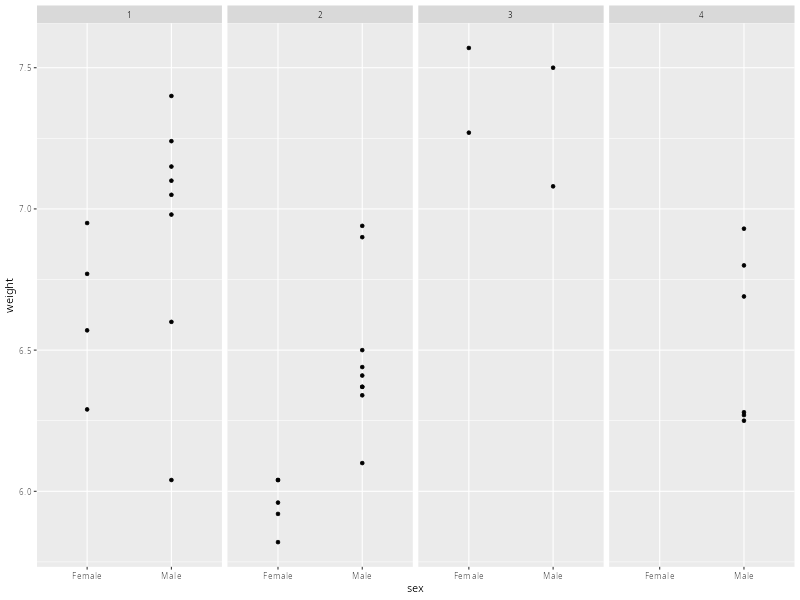

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

In [8]:
library(ggplot2)

ggplot(ratpup[1:36,],
       aes(x=sex,
           y=weight))+
  geom_point()+
  geom_smooth()+
  facet_grid(~litter)

## Adding `litsize`